# Libraries

In [4]:
pip install optree


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install tensorflow


Defaulting to user installation because normal site-packages is not writeable
     -------------------------------------- 385.0/385.0 MB 1.2 MB/s eta 0:00:00
     ------------------------------------ 133.7/133.7 kB 225.7 kB/s eta 0:00:00
     ---------------------------------------- 5.5/5.5 MB 708.7 kB/s eta 0:00:00
     ---------------------------------------- 26.4/26.4 MB 1.2 MB/s eta 0:00:00
     -------------------------------------- 126.6/126.6 kB 1.2 MB/s eta 0:00:00
     ---------------------------------------- 4.3/4.3 MB 925.1 kB/s eta 0:00:00
     ------------------------------------ 413.4/413.4 kB 613.7 kB/s eta 0:00:00
     ---------------------------------------- 3.0/3.0 MB 533.4 kB/s eta 0:00:00
     ---------------------------------------- 1.1/1.1 MB 692.0 kB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 576.1 kB/s eta 0:00:00
     -------------------------------------- 65.5/65.5 kB 587.7 kB/s eta 0:00:00
     -------------------------------------

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [9]:
pip install imgaug


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import imgaug as ia
import imgaug.augmenters as iaa
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import operator
import tensorflow as tf
import random
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import skimage
from skimage.io import imread, imshow, imsave

# Crop

In [3]:
def crop_center(img, bounding):
    start = tuple(map(lambda a, da: a//2-da//2, img.shape, bounding))
    end = tuple(map(operator.add, start, bounding))
    slices = tuple(map(slice, start, end))
    return img[slices]

# Directory

In [8]:
'''Source Path'''
train_all_path = r'F:\Leuk study re-designed\C-NMC\High Imbalance\Train - 1 to 100 ratio\all'
train_hem_path = r'F:\Leuk study re-designed\C-NMC\High Imbalance\Train - 1 to 100 ratio\hem'  # augment this

print(train_all_path)


F:\Leuk study re-designed\C-NMC\High Imbalance\Train - 1 to 100 ratio\all


In [9]:
train_all_list = os.listdir(train_all_path)
train_all_list.sort()

train_hem_list = os.listdir(train_hem_path)       # augment this
train_hem_list.sort()



print('train/all: ', len(train_all_list))
print('train/hem :', len(train_hem_list))


train/all:  33
train/hem : 3389


In [11]:
train_all_batch = np.zeros((len(train_all_list), 210, 210, 3), dtype=np.uint8)
train_hem_batch = np.zeros((len(train_hem_list), 210, 210, 3), dtype=np.uint8)    # augment this


print(train_all_batch.shape, train_hem_batch.shape)


(33, 210, 210, 3) (3389, 210, 210, 3)


# Read and crop function

In [12]:
def Read_n_Crop(list_data, batch, path):
    i=0
    for x in list_data:
        image = imread(os.path.join(path, x))
        image = crop_center(image, (210,210,3))
        batch[i] = image
        i+=1

    print(type(batch), batch.shape, batch.dtype, batch[0].shape, batch[0].dtype)

In [13]:
Read_n_Crop(train_all_list, train_all_batch, train_all_path)
Read_n_Crop(train_hem_list, train_hem_batch, train_hem_path)      # augment this



<class 'numpy.ndarray'> (33, 210, 210, 3) uint8 (210, 210, 3) uint8
<class 'numpy.ndarray'> (3389, 210, 210, 3) uint8 (210, 210, 3) uint8


# Save cropped images

In [14]:
'''Save Oversampled Cropped Images'''
def SaveOC_images(list_data, path, batch):
    for x in range(len(list_data)):
#         print(path)
        new_path = path + '/' + list_data[x]
        print(new_path)
#         break
        imsave(new_path ,batch[x])

In [21]:
path = 'F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/all'
SaveOC_images(train_all_list, path, train_all_batch)
path = 'F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem'
SaveOC_images(train_hem_list, path, train_hem_batch)     # augment this


F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/all/UID_11_12_2_all.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/all/UID_11_37_1_all.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/all/UID_15_15_1_all.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/all/UID_16_28_2_all.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/all/UID_17_28_3_all.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/all/UID_20_8_1_all.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/all/UID_21_38_5_all.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/all/UID_23_21_1_all.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/all/UID_25_5_3_all.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/all/UID_25_9_1_all.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/all/UID_26_11_2_all.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/all/UID_27_8_3_all.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/a

F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H10_159_2_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H10_159_3_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H10_15_1_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H10_160_1_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H10_161_1_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H10_162_1_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H10_162_2_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H10_163_1_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H10_163_2_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H10_164_1_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H10_164_2_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H10_165_1_hem.bmp
F:/Leuk study re-designed/C-N

F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H10_68_1_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H10_6_1_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H10_6_2_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H10_70_1_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H10_71_1_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H10_72_1_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H10_73_1_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H10_74_1_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H10_75_1_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H10_75_2_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H10_76_1_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H10_76_2_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbal

F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H11_1_1_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H11_20_1_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H11_20_2_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H11_21_1_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H11_21_2_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H11_3_1_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H11_4_1_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H11_5_1_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H11_6_1_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H11_6_2_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H11_7_1_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H11_8_1_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/1

F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H12_3_4_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H12_3_5_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H12_3_6_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H12_4_1_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H12_4_2_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H12_4_3_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H12_4_4_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H12_4_5_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H12_5_1_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H12_5_2_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H12_5_3_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H12_5_4_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x A

F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H13_29_1_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H13_29_2_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H13_29_3_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H13_29_4_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H13_2_1_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H13_2_2_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H13_2_3_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H13_2_4_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H13_2_5_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H13_2_6_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H13_2_7_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H13_2_8_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/1

F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H14_16_14_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H14_16_1_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H14_16_2_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H14_16_3_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H14_16_4_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H14_16_5_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H14_16_6_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H14_16_7_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H14_16_8_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H14_16_9_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H14_17_10_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H14_17_11_hem.bmp
F:/Leuk study re-designed/C-NMC/High 

F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H14_29_13_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H14_29_14_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H14_29_15_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H14_29_1_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H14_29_2_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H14_29_3_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H14_29_4_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H14_29_5_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H14_29_6_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H14_29_7_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H14_29_8_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H14_29_9_hem.bmp
F:/Leuk study re-designed/C-NMC/High 

F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H14_9_13_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H14_9_14_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H14_9_15_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H14_9_1_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H14_9_2_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H14_9_3_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H14_9_4_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H14_9_5_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H14_9_6_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H14_9_7_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H14_9_8_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H14_9_9_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10

F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H15_24_10_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H15_24_11_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H15_24_12_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H15_24_13_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H15_24_14_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H15_24_15_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H15_24_16_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H15_24_1_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H15_24_2_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H15_24_3_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H15_24_4_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H15_24_5_hem.bmp
F:/Leuk study re-designed/C-NMC/H

F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H16_31_4_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H16_32_1_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H16_32_2_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H16_3_1_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H16_4_1_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H16_4_2_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H16_4_3_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H16_5_1_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H16_5_2_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H16_5_3_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H16_5_4_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H16_6_1_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10

F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H17_5_1_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H17_6_1_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H17_7_1_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H17_8_1_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H17_8_2_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H17_9_1_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H17_9_2_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H17_9_3_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H18_10_1_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H18_10_2_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H18_11_1_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H18_11_2_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/1

F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H1_8_1_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H1_9_1_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H20_10_1_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H20_10_2_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H20_10_3_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H20_11_1_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H20_12_1_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H20_12_2_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H20_13_1_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H20_13_2_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H20_13_3_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H20_13_4_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalan

F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H22_16_5_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H22_16_6_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H22_16_7_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H22_16_8_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H22_17_10_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H22_17_11_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H22_17_12_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H22_17_13_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H22_17_1_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H22_17_2_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H22_17_3_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H22_17_4_hem.bmp
F:/Leuk study re-designed/C-NMC/High

F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H22_29_1_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H22_29_2_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H22_29_3_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H22_29_4_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H22_29_5_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H22_29_6_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H22_29_7_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H22_29_8_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H22_29_9_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H22_2_1_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H22_2_2_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H22_2_3_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbala

F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H22_4_1_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H22_4_2_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H22_4_3_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H22_4_4_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H22_4_5_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H22_4_6_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H22_4_7_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H22_4_8_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H22_4_9_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H22_5_10_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H22_5_11_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H22_5_12_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10

F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H23_15_2_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H23_15_3_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H23_15_4_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H23_15_5_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H23_15_6_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H23_15_7_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H23_15_8_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H23_15_9_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H23_16_10_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H23_16_11_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H23_16_12_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H23_16_13_hem.bmp
F:/Leuk study re-designed/C-NMC/High

F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H23_32_1_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H23_32_2_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H23_33_1_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H23_33_2_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H23_33_3_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H23_33_4_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H23_34_1_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H23_34_2_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H23_34_3_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H23_34_4_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H23_34_5_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H23_35_1_hem.bmp
F:/Leuk study re-designed/C-NMC/High imb

F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H24_12_8_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H24_12_9_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H24_13_10_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H24_13_11_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H24_13_12_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H24_13_13_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H24_13_14_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H24_13_15_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H24_13_16_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H24_13_17_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H24_13_18_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H24_13_1_hem.bmp
F:/Leuk study re-designed/C-NMC

F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H24_25_6_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H24_25_7_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H24_25_8_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H24_25_9_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H24_26_1_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H24_26_2_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H24_26_3_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H24_26_4_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H24_26_5_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H24_27_10_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H24_27_11_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H24_27_1_hem.bmp
F:/Leuk study re-designed/C-NMC/High i

F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H24_3_10_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H24_3_11_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H24_3_12_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H24_3_13_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H24_3_14_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H24_3_15_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H24_3_1_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H24_3_2_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H24_3_3_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H24_3_4_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H24_3_5_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H24_3_6_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance

F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H2_32_3_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H2_32_4_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H2_33_1_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H2_33_2_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H2_33_3_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H2_34_1_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H2_34_2_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H2_34_3_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H2_34_4_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H2_35_1_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H2_35_2_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H2_36_1_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x A

F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H40_22_3_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H40_22_4_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H40_22_5_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H40_22_6_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H40_22_7_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H40_23_1_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H40_23_2_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H40_23_3_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H40_23_4_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H40_23_5_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H40_23_6_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H40_23_7_hem.bmp
F:/Leuk study re-designed/C-NMC/High imb

F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H48_1_1_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H48_2_1_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H48_2_2_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H48_2_3_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H48_2_4_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H48_2_5_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H48_3_1_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H48_4_1_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H48_6_1_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H48_6_2_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H48_6_3_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H48_6_4_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x A

F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H8_2_3_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H8_2_4_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H8_3_1_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H8_4_1_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H8_4_2_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H8_4_3_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H8_4_4_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H8_5_1_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H8_5_2_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H8_6_1_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H8_7_1_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H8_7_2_hem.bmp
F:/Leuk study re-designed/C-NMC/High imbalance/10x Aug/hem/UID_H

# Visualize saved images

In [22]:
def Plot_images(batch, num):
    i=0
    plt.figure(figsize=(15,15))
    for x in batch:
        if 0<=i<(num*num):
            plt.subplot(num,num,i+1)
            plt.imshow(x)
        else:
            break
        i +=1

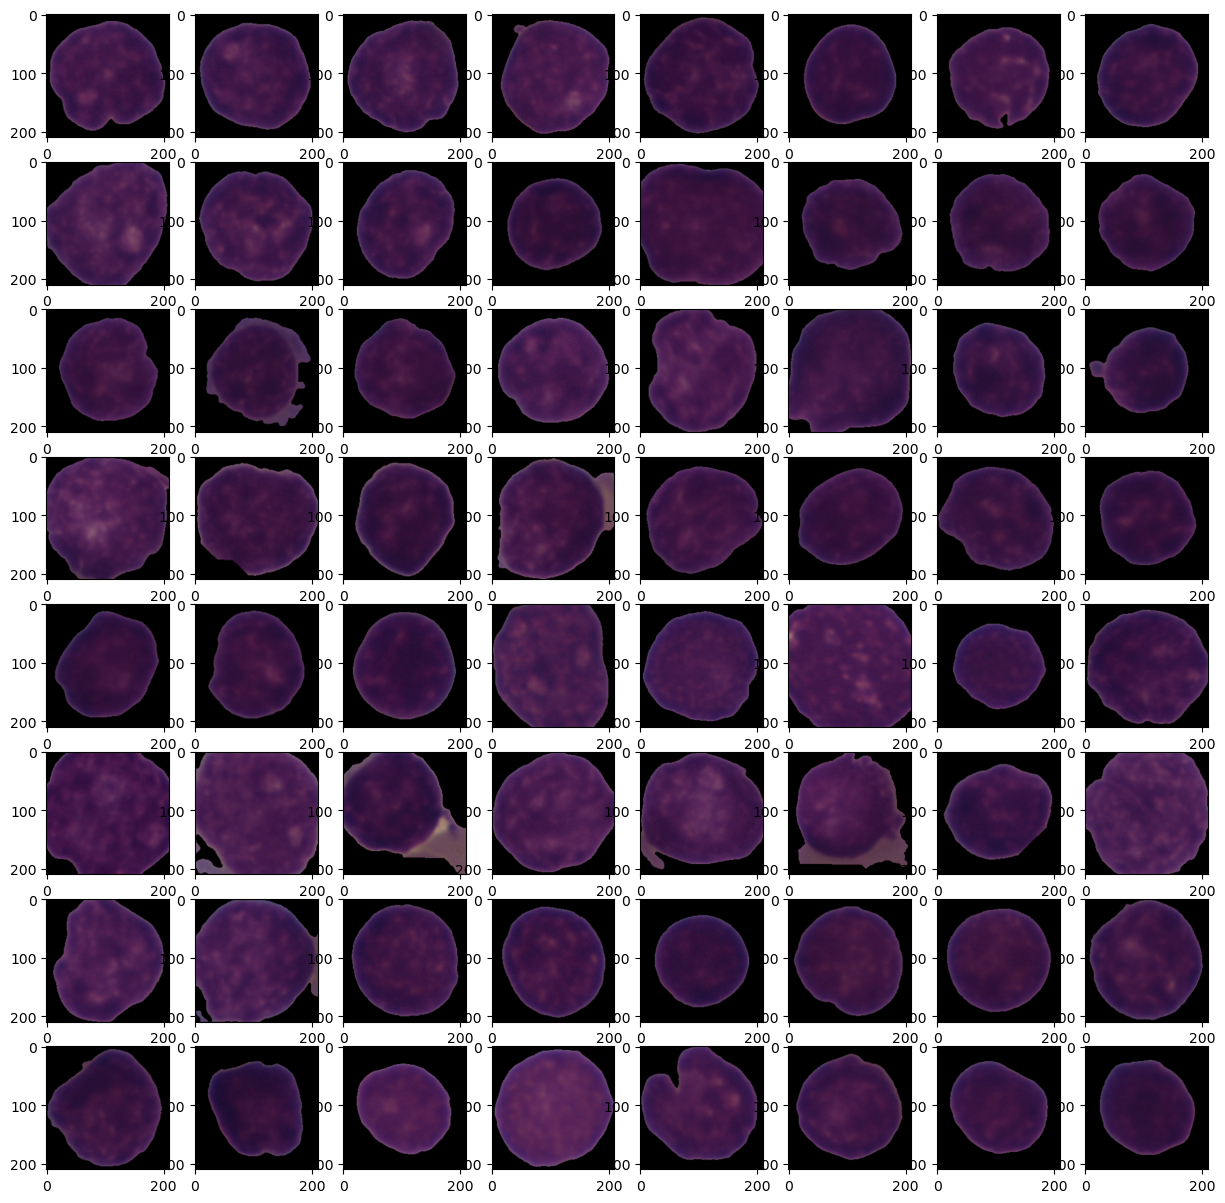

In [23]:
num = 8 # row n col
Plot_images(train_hem_batch, num)

# Augmentation pipeline

In [24]:
sometimes = lambda aug: iaa.Sometimes(0.5, aug)
seq = iaa.Sequential([
    # apply the following augmenters to most images
        iaa.Fliplr(0.5), # horizontally flip 50% of all images
        iaa.Flipud(0.2), # vertically flip 20% of all images
        # crop images by -5% to 10% of their height/width
         iaa.Crop(percent=(0, 0.1)), # random crops

        sometimes(iaa.CropAndPad(
            pad_mode=ia.ALL,
            percent=(-0.05, 0.1),
            pad_cval=(0, 255)
        )),

      sometimes(iaa.Affine(
            scale={"x": (0.8, 1.2), "y": (0.8, 1.2)}, # scale images to 80-120% of their size, individually per axis
            translate_percent={"x": (-0.2, 0.2), "y": (-0.2, 0.2)}, # translate by -20 to +20 percent (per axis)
            rotate=(-45, 45), # rotate by -45 to +45 degrees

        )),
],
random_order=True
)

# Augment and save

In [25]:
def AugmentNsave_images(seq, batch, list_data, path, n):
    '''Augment'''
    images_aug = seq(images=batch)
    print(type(images_aug), images_aug.shape, images_aug.dtype, np.max(images_aug), np.min(images_aug), images_aug[0].shape, images_aug[0].dtype, np.max(images_aug[0]), np.min(images_aug[0]))
    '''Save'''
    for x in range(len(list_data)):
        #print(path)
        new_path = path + '/' + str(n) + 'Aug_' + list_data[x]
        print(new_path)
        imsave(new_path ,images_aug[x])

# 5x or 10x Aug

In [27]:
'''Each time augmented results are different'''
times2augment = 5
path = 'F:/Leuk study re-designed/C-NMC/High Imbalance/10x Aug/all'
for x in range(times2augment):
    AugmentNsave_images(seq,train_all_batch, train_all_list, path, x+1)



<class 'numpy.ndarray'> (33, 210, 210, 3) uint8 150 0 (210, 210, 3) uint8 148 0
F:/Leuk study re-designed/C-NMC/High Imbalance/10x Aug/all/1Aug_UID_11_12_2_all.bmp
F:/Leuk study re-designed/C-NMC/High Imbalance/10x Aug/all/1Aug_UID_11_37_1_all.bmp
F:/Leuk study re-designed/C-NMC/High Imbalance/10x Aug/all/1Aug_UID_15_15_1_all.bmp
F:/Leuk study re-designed/C-NMC/High Imbalance/10x Aug/all/1Aug_UID_16_28_2_all.bmp
F:/Leuk study re-designed/C-NMC/High Imbalance/10x Aug/all/1Aug_UID_17_28_3_all.bmp
F:/Leuk study re-designed/C-NMC/High Imbalance/10x Aug/all/1Aug_UID_20_8_1_all.bmp
F:/Leuk study re-designed/C-NMC/High Imbalance/10x Aug/all/1Aug_UID_21_38_5_all.bmp
F:/Leuk study re-designed/C-NMC/High Imbalance/10x Aug/all/1Aug_UID_23_21_1_all.bmp
F:/Leuk study re-designed/C-NMC/High Imbalance/10x Aug/all/1Aug_UID_25_5_3_all.bmp
F:/Leuk study re-designed/C-NMC/High Imbalance/10x Aug/all/1Aug_UID_25_9_1_all.bmp
F:/Leuk study re-designed/C-NMC/High Imbalance/10x Aug/all/1Aug_UID_26_11_2_all.bmp

F:/Leuk study re-designed/C-NMC/High Imbalance/10x Aug/all/5Aug_UID_23_21_1_all.bmp
F:/Leuk study re-designed/C-NMC/High Imbalance/10x Aug/all/5Aug_UID_25_5_3_all.bmp
F:/Leuk study re-designed/C-NMC/High Imbalance/10x Aug/all/5Aug_UID_25_9_1_all.bmp
F:/Leuk study re-designed/C-NMC/High Imbalance/10x Aug/all/5Aug_UID_26_11_2_all.bmp
F:/Leuk study re-designed/C-NMC/High Imbalance/10x Aug/all/5Aug_UID_27_8_3_all.bmp
F:/Leuk study re-designed/C-NMC/High Imbalance/10x Aug/all/5Aug_UID_2_5_4_all.bmp
F:/Leuk study re-designed/C-NMC/High Imbalance/10x Aug/all/5Aug_UID_2_8_3_all.bmp
F:/Leuk study re-designed/C-NMC/High Imbalance/10x Aug/all/5Aug_UID_30_17_1_all.bmp
F:/Leuk study re-designed/C-NMC/High Imbalance/10x Aug/all/5Aug_UID_30_7_6_all.bmp
F:/Leuk study re-designed/C-NMC/High Imbalance/10x Aug/all/5Aug_UID_34_11_3_all.bmp
F:/Leuk study re-designed/C-NMC/High Imbalance/10x Aug/all/5Aug_UID_37_17_10_all.bmp
F:/Leuk study re-designed/C-NMC/High Imbalance/10x Aug/all/5Aug_UID_45_25_13_all.bm